# Explore here

In [1]:
# importar pandas, leer datos.
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
#crear data frame solo con las columnas Latitude, Longitude y MedInc
df1 = df[["Latitude","Longitude", "MedInc"]]
df1

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [4]:
#dividimos el data frame en train y test. como no hay Y solo seleccionamos X_train y X_test

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df1, test_size=0.2, random_state=42)
print(X_train.shape)

(16512, 3)


In [5]:
#construir un k-means de 6 clusters y lo entrenamos con X_train
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=6, random_state=42)
modelo.fit(X_train)

#creamos una columna nueva en el conjunto X_train, que corresponde al grupo asignado por el modelo de clustering
X_train['cluster'] = modelo.predict(X_train)

X_train.head()


,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


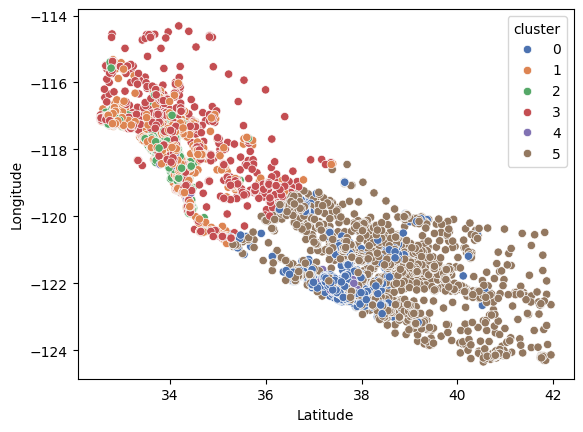

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=X_train, x="Latitude",y="Longitude", hue="cluster", palette='deep')
plt.show()

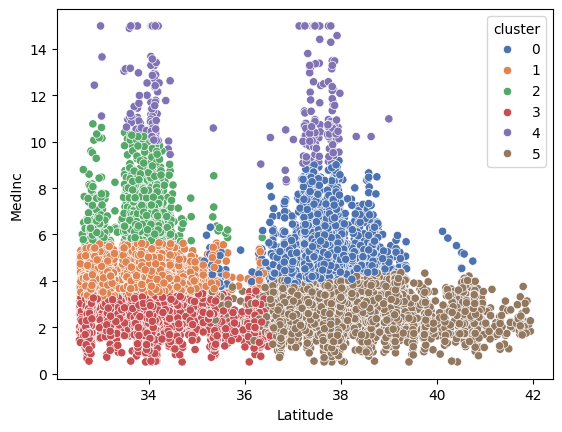

In [8]:
sns.scatterplot(data=X_train, x="Latitude",y="MedInc", hue="cluster", palette='deep')
plt.show()

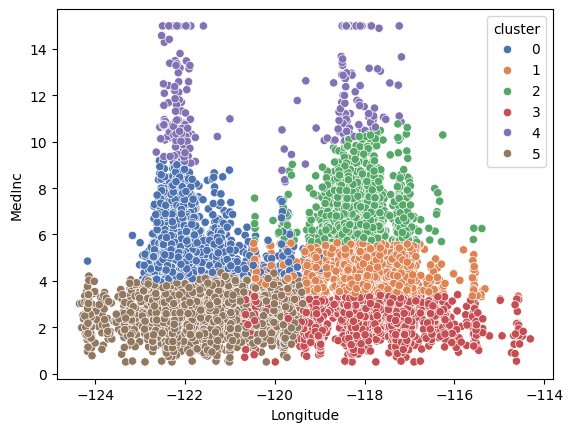

In [9]:
sns.scatterplot(data=X_train, x="Longitude",y="MedInc", hue="cluster", palette='deep')
plt.show()

In [10]:
#ahora predecimos sobre los X_test. guardamos estas predicciones en la columna cluster

X_test["cluster"] = modelo.predict(X_test)
X_test.head()

#le asigné cluster a datos que mi modelo no ha visto

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


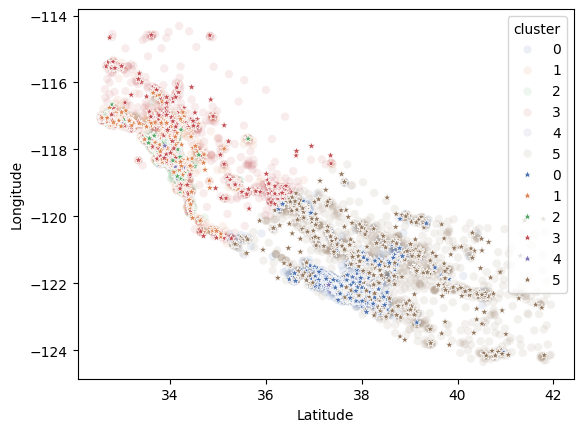

In [12]:
#ahora graficar gráfico sobre gráfico, para comparar las agrupaciones hechas en mi train y en mi test
#agregamos alpha a train para que muestre ese resultado difuminado y encima más oscuro el color de test

sns.scatterplot(data=X_train, x="Latitude",y="Longitude", hue="cluster", palette='deep', alpha=0.1)
sns.scatterplot(data=X_test, x="Latitude",y="Longitude", hue="cluster", palette='deep', marker="*")
plt.show()

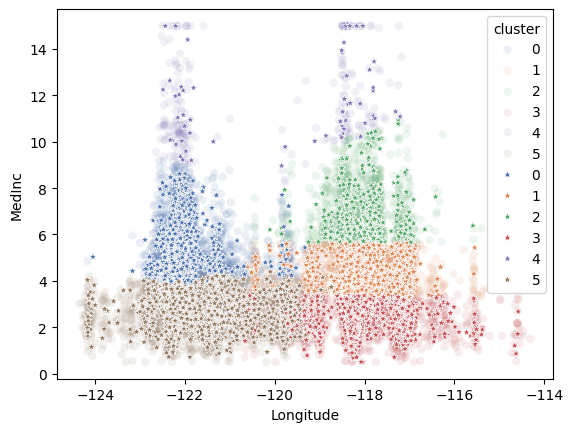

In [13]:
sns.scatterplot(data=X_train, x="Longitude",y="MedInc", hue="cluster", palette='deep', alpha=0.1)
sns.scatterplot(data=X_test, x="Longitude",y="MedInc", hue="cluster", palette='deep',marker="*")
plt.show()

In [14]:
#clasificar nuestro modelo usando un modelo supervisado. usaremos un arbol de decisiones porque hay variables relacionadas (lo que descarta Bayes)
#descartamos random forest tambien porque tenemos pocas columnas. No tenemos que preocuparnos demasiado del sobreajuste.
#descartamos boosting tambien por la poca complejidad de los datos
#de todas maneras probaremos tambien un random forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

modelo_dtree = DecisionTreeClassifier(random_state=42)
modelo_rforest = RandomForestClassifier(random_state=42)

#separo los datos en X e Y
y_train = X_train["cluster"]
X_train = X_train.drop(["cluster"], axis=1)

modelo_dtree.fit(X_train, y_train)
modelo_rforest.fit(X_train,y_train)

#separo test en X e Y
y_test = X_test["cluster"]
X_test = X_test.drop(["cluster"], axis=1)

y_predict_dtree = modelo_dtree.predict(X_test)
y_predict_rforest = modelo_rforest.predict(X_test)


In [15]:
#medimos los resultados

from sklearn.metrics import accuracy_score

accuracy_score_dtree = accuracy_score(y_test, y_predict_dtree)
accuracy_score_rforest = accuracy_score(y_test, y_predict_rforest)

print(f"Accuracy desicion tree: {accuracy_score_dtree}. Accuracy random forest: {accuracy_score_rforest}")

Accuracy desicion tree: 0.9941860465116279. Accuracy random forest: 0.9956395348837209


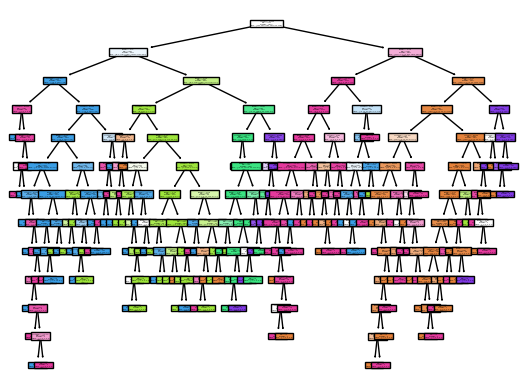

In [16]:
#la ventaja del arbol de decision es que lo puedo graficar
from sklearn import tree

tree.plot_tree(modelo_dtree, feature_names= X_train.columns, class_names = ["0","1","2","3","4","5"], filled=True)
plt.show()

In [ ]:
#guardar los 3 modelos con pickle